# Unclassified Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**RIZQAH, MENIERS**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


## Introduction


### Predict Overview: Movie Recommendation Wilderness

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

<a id="cont"></a>

#### Work Flow


<a href=#two>1. Python Packages

<a href=#two>2. Improting Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4.</a>

<a href=#five>5. </a>

<a href=#six>6. </a>

<a href=#seven>7. </a>

### 1. Python Packages

The following packages will be imported and used to build our model:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline

from tqdm import tqdm
from scipy import sparse

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### 2. Importing Data

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [4]:
df_movies = pd.read_csv('movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [5]:
#Merge columns
user_movie_rating = pd.merge(df_train,df_movies,on='movieId')
user_movie_rating

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
10000033,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War
10000034,72315,190143,2.5,1567628158,Formentera Lady,(no genres listed)
10000035,131116,206347,3.0,1568558126,Nocturne (1946),Crime|Drama|Mystery
10000036,85757,196867,3.5,1563175258,Guys & Balls (2004),Comedy|Romance


In [6]:
user_movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 534.1+ MB


### EDA

Let's explore the data a bit and get a look at some of the best rated movies.

Ratings dataframe with average rating and number of ratings:

In [7]:
#Average rating per movie
user_movie_rating.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Which Way Home (2009)        5.0
Kaakha Kaakha (2003)         5.0
Not Quite Human II (1989)    5.0
Selling Isobel (2018)        5.0
Sehar (2005)                 5.0
Name: rating, dtype: float64

In [8]:
#Number for ratings given per movie
user_movie_rating.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: rating, dtype: int64

In [9]:
#Mean of ratings
ratings = pd.DataFrame(user_movie_rating.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.753731
#1 Cheerleader Camp (2010),1.900000
#Female Pleasure (2018),4.000000
#FollowMe (2019),2.400000


In [10]:
#add number of ratings column
ratings['total ratings'] = pd.DataFrame(user_movie_rating.groupby('title')['rating'].count())
ratings.head()

,rating,total ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5


<AxesSubplot:>

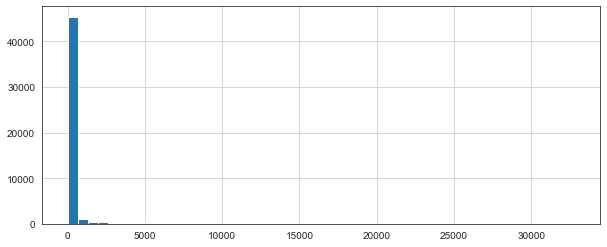

In [11]:
#Histogram for number of ratings
plt.figure(figsize=(10,4))
ratings['total ratings'].hist(bins=50)

<AxesSubplot:>

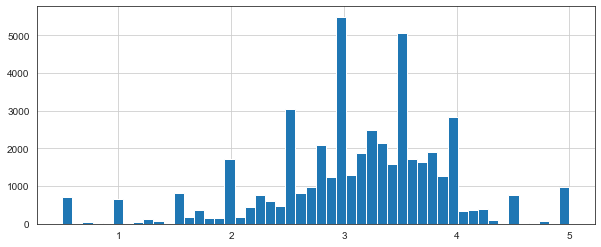

In [12]:
#Histogram for ratings
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)

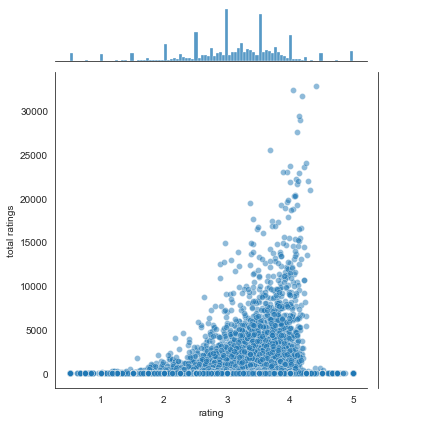

In [13]:
#Number of ratings compared to rating given
sns.jointplot(x='rating',y='total ratings',data=ratings,alpha=0.5)

### Model Engineering

In [14]:
#turn data into chunks due to large size
n = 500000  #chunk row size
df = [user_movie_rating[i:i+n] for i in range(0,user_movie_rating.shape[0],n)]
df

[        userId  movieId  rating   timestamp                title  \
 0         5163    57669     4.0  1518349992     In Bruges (2008)   
 1        87388    57669     3.5  1237455297     In Bruges (2008)   
 2       137050    57669     4.0  1425631854     In Bruges (2008)   
 3       120490    57669     4.5  1408228517     In Bruges (2008)   
 4        50616    57669     4.5  1446941640     In Bruges (2008)   
 ...        ...      ...     ...         ...                  ...   
 499995   88184      296     1.0   845642016  Pulp Fiction (1994)   
 499996  121657      296     4.0  1534439981  Pulp Fiction (1994)   
 499997  124577      296     4.0   840477304  Pulp Fiction (1994)   
 499998   29268      296     3.5  1115512294  Pulp Fiction (1994)   
 499999   17116      296     2.0   940937653  Pulp Fiction (1994)   
 
                              genres  
 0       Comedy|Crime|Drama|Thriller  
 1       Comedy|Crime|Drama|Thriller  
 2       Comedy|Crime|Drama|Thriller  
 3       Comed

In [15]:
total_chunks = sum(1 for chunk in df)
total_chunks

21

In [16]:
set1= df[0]
set2= df[1]
set3= df[2]
set4= df[3]
set5= df[4]
set6= df[5]
set7= df[6]
set8= df[7]
set9= df[8]
set10= df[9]
set11= df[10]
set12= df[11]
set13= df[12]
set14= df[13]
set15= df[14]
set16= df[15]
set17= df[16]
set18= df[17]
set19= df[18]
set20= df[19]
set21= df[20]

In [17]:
set1

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
499995,88184,296,1.0,845642016,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
499996,121657,296,4.0,1534439981,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
499997,124577,296,4.0,840477304,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
499998,29268,296,3.5,1115512294,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [18]:
sets = [set1, set2, set3, set4, set5, set6, set7, set8, set9, set10]
chunk = pd.concat(sets)

In [19]:
sets2 = [set11, set12, set13, set14, set15, set16, set17, set18, set19, set20]
chunk2 = pd.concat(sets2)

In [20]:
#matrix with user ids on one access and movie titles on another
#Using subset as data is too big

movierate = chunk.pivot(index='userId',columns='title',values='rating')
movierate

title,*batteries not included (1987),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Rent Boys (2000),102 Dalmatians (2000),12 Angry Men (1957),12 Years a Slave (2013),15 Minutes (2001),1984 (1956),...,You Don't Mess with the Zohan (2008),You've Got Mail (1998),Young Frankenstein (1974),Young Guns II (1990),Your Highness (2011),Your Name. (2016),Zardoz (1974),Zeitgeist: Addendum (2008),Zone Troopers (1985),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162538,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Most rated movie
ratings.sort_values('total ratings',ascending=False).head()

,rating,total ratings
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
Forrest Gump (1994),4.047216,32383
Pulp Fiction (1994),4.195097,31697
"Silence of the Lambs, The (1991)",4.144172,29444
"Matrix, The (1999)",4.154253,29014


In [22]:
#Find correlation between one movie to dataset
pulp_ratings = movierate['Pulp Fiction (1994)']
pulp_ratings

userId
1         5.0
2         NaN
3         NaN
4         4.0
5         4.0
         ... 
162537    NaN
162538    NaN
162539    NaN
162540    NaN
162541    NaN
Name: Pulp Fiction (1994), Length: 162323, dtype: float64

In [23]:
suggestions = movierate.corrwith(pulp_ratings)

C:\Users\menie\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\menie\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
corr_movies = pd.DataFrame(suggestions,columns=['Correlation'])
corr_movies.dropna(inplace=True)
corr_movies

,Correlation
title,
*batteries not included (1987),0.025260
10 Cloverfield Lane (2016),0.181438
10 Things I Hate About You (1999),-0.081152
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.071233
102 Dalmatians (2000),-0.025894
...,...
Your Name. (2016),0.073431
Zardoz (1974),0.254962
Zeitgeist: Addendum (2008),0.390844


In [25]:
#Sort to get most similar on top
corr_movies.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
We Will Not Get Used To (2016),1.000000
Den radio (2001),1.000000
Pulp Fiction (1994),1.000000
Always Watching: A Marble Hornets Story (2015),1.000000
Derren Brown: Sacrifice (2018),1.000000
"Man Who Could Work Miracles, The (1936)",1.000000
Late Night (2019),0.845504
The Hate U Give (2018),0.636975
My Wife is an Actress (Ma Femme est une Actrice) (2001),0.594226


In [26]:
#Filter to only get movies with rating for 100 or more
corr_movies = corr_movies.join(ratings['total ratings'])
corr_movies.head()

,Correlation,total ratings
title,,
*batteries not included (1987),0.025260,699
10 Cloverfield Lane (2016),0.181438,1459
10 Things I Hate About You (1999),-0.081152,5471
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.071233,3359
102 Dalmatians (2000),-0.025894,671


In [27]:
corr_movies[corr_movies['total ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,total ratings
title,,
Pulp Fiction (1994),1.000000,31697
Reservoir Dogs (1992),0.546262,13998
Gun Crazy (a.k.a. Deadly Is the Female) (1949),0.515246,114
Kill Bill: Vol. 2 (2004),0.486871,11408
Kill Bill: Vol. 1 (2003),0.470664,13400


In [28]:
X = df['newmessage']
y = df['sentiment']

###test
X_real = test['newmessage']